<a href="https://colab.research.google.com/github/gabrielgranados97/IA_Tarea4/blob/main/Tarea4_Regresioncuantil_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model



print(tf.__version__)

2.8.0


In [ ]:
#separando datos de entrenamiento y test
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_labels = train_dataset.pop('times')
test_labels = test_dataset.pop('times')

In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
accel,106.0,-24.968868,47.923883,-134.0,-54.9,-5.4,0.0,75.0


In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_test_data.shape

(27, 1)

In [ ]:
#Modelo
model = keras.Sequential([
layers.Dense(64, activation='relu', input_shape=(normed_train_data.shape[1],)),
layers.Dense(64, activation='relu'),
layers.Dense(1)
])

In [ ]:
#compila
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.nn import Flatten, Sequential, Linear, ReLU

import matplotlib.pyplot as plt
import numpy as np

#from torch.nn import Flatten, Sequential, Linear, ReLU

In [ ]:
from google.colab import drive #correr solo en colab
drive.mount('/content/gdrive')
ruta='/content/gdrive/MyDrive/Colab Notebooks/mcycle.xlsx'
mcycle=pd.read_excel(ruta)
mcycle

# Reformar formato de variables de ingreso para red neuronal
times = np.expand_dims(mcycle.times.values, 1)
accel = np.expand_dims(mcycle.accel.values, 1)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dataset = mcycle.copy()
dataset.tail()

,times,accel
128,53.2,-14.7
129,55.0,-2.7
130,55.0,10.7
131,55.4,-2.7
132,57.6,10.7


In [ ]:
#separando datos de entrenamiento y test
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
# define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        #llama al cosntructor de la clase base
        super(NeuralNetwork, self).__init__()
        # define las capas que usará en la construcción del modelo
        self.flatten = Flatten()
        self.linear_relu_stack = Sequential(
            Linear(28*28, 512),
            ReLU(),
            Linear(512, 512),
            ReLU(),
            Linear(512, 10),
            ReLU()
        )
        
    # El método forward es la que define la estructura de la red
    # en este ejemplo aceptamos solo una entrada, pero si lo desea,
    # siéntase libre de usar más
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# instancia un objeto
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [ ]:

def mcycleModel():
    model = Sequential()
    model.add(Dense(units=10, input_dim=1,activation='relu'))
    model.add(Dense(units=10, input_dim=1,activation='relu'))
    model.add(Dense(1))
    
    return model

AttributeError: ignored

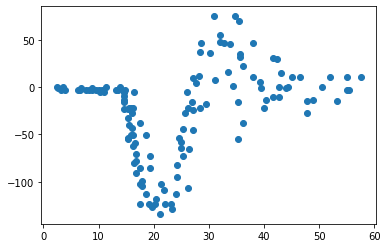

In [ ]:
qs = [0.1, 0.5, 0.9]

t_test = np.linspace(mcycle.times.min(),mcycle.times.max(),200)
plt.scatter(mcycle.times,mcycle.accel)

for q in qs:
    model = mcycleModel()
    model.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer='adadelta')
    model.fit(mcycle.times.values, mcycle.accel.values, epochs=2000, batch_size=32, verbose=0)
    
    # Predict the quantile
    y_test = model.predict(t_test)
    plt.plot(t_test, y_test, label=q) # plot out this quantile

plt.legend()    
plt.show()   